In [1177]:
# import libaries
import numpy as np
import pandas as pd
import IPython.display as display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Pretty display for notebooks
%matplotlib inline

In [1178]:
#load data
raw_data=pd.read_csv('train.csv')
raw_test=pd.read_csv('test.csv')

In [1179]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1236]:
raw_data.shape

(891, 14)

In [1180]:
raw_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1237]:
raw_test.shape

(418, 11)

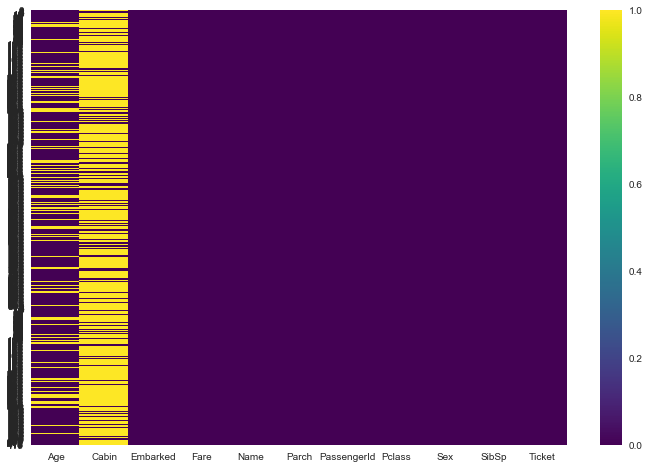

In [1181]:
plt.figure(figsize=(12,8))
raw_tot=pd.concat([raw_data,raw_test])
sns.heatmap(raw_tot.drop('Survived',axis=1).isnull(),cmap='viridis')

### (1) Survial vs Sex

In [1182]:
raw_data[raw_data['Sex']=='female'].shape[0]+raw_data[raw_data['Sex']=='male'].shape[0]

891

In [1183]:
raw_test['Sex']=raw_test['Sex'].fillna(0)
raw_test[raw_test['Sex']==0].shape[0]

0

**Mark**:No data missing for Sex

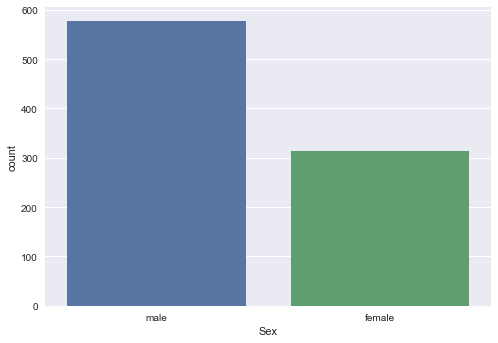

In [1184]:
sns.set(style="darkgrid")
sns.countplot(x="Sex", data=raw_data)
sns.plt.show()

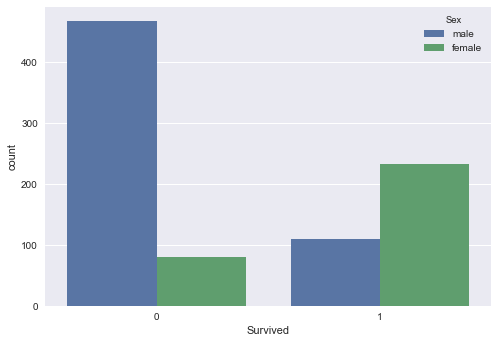

In [1185]:
sns.countplot(x="Survived", hue="Sex", data=raw_data)
sns.plt.show()

### To be more specific with sex

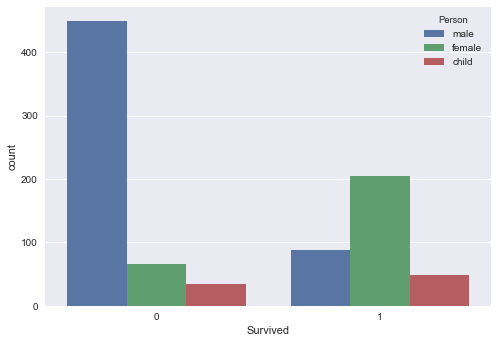

In [1186]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
raw_data['Person'] = raw_data[['Age','Sex']].apply(get_person,axis=1)
sns.countplot(x="Survived", hue="Person", data=raw_data)
sns.plt.show()

### (2) Survial vs Class

In [1187]:
raw_data[raw_data['Pclass']==1].shape[0]+raw_data[raw_data['Pclass']==2].shape[0]+ \
raw_data[raw_data['Pclass']==3].shape[0]

891

In [1188]:
raw_test['Pclass']=raw_test['Pclass'].fillna(0)
raw_test[raw_test['Pclass']==0].shape[0]

0

**Mark**:No data missing for Class

In [1189]:
survived_class = pd.crosstab(index=raw_data["Survived"], 
                            columns=raw_data["Pclass"])

survived_class.columns = ["class1","class2","class3"]
survived_class.index= ["died","survived"]
survived_class

,class1,class2,class3
died,80,97,372
survived,136,87,119


### (3) Survial vs Embark

In [1190]:
raw_data[raw_data['Embarked']=='S'].shape[0]+raw_data[raw_data['Embarked']=='Q'].shape[0]+ \
raw_data[raw_data['Embarked']=='C'].shape[0]

889

**mark**: there are 2 missing data on embark for train set:
to **fill** or **drop** need investigation ???

In [1191]:
raw_data['Embarked']=raw_data['Embarked'].fillna('N')
raw_data[raw_data['Embarked']=='N'].shape[0]

2

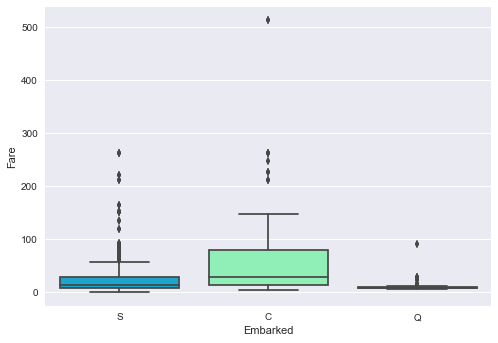

In [1192]:
sns.boxplot(x='Embarked',y='Fare',data=raw_tot,palette='rainbow')

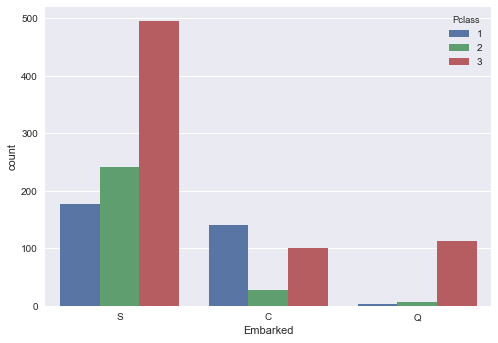

In [1193]:
sns.countplot(x="Embarked", hue="Pclass", data=raw_tot)

In [1194]:
raw_test['Embarked']=raw_test['Embarked'].fillna('N')
raw_test[raw_test['Embarked']=='N'].shape[0]

0

**mark** no missing data for test set

In [1195]:
survived_embark = pd.crosstab(index=raw_data["Survived"], 
                            columns=raw_data["Embarked"])

survived_embark.columns = ["Cherbourg","None","Queenstown","Southampton"]
survived_embark.index= ["died","survived"]
survived_embark

,Cherbourg,None,Queenstown,Southampton
died,75,0,47,427
survived,93,2,30,217


### (4) Survial vs Cabin
** Note**: some cabin data are missing, it could be no cabins or just missing

first, we need to change cabin serial no into the count of cabins

In [1196]:
raw_data['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [1197]:
raw_test['Cabin']

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
5                  NaN
6                  NaN
7                  NaN
8                  NaN
9                  NaN
10                 NaN
11                 NaN
12                 B45
13                 NaN
14                 E31
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 NaN
22                 NaN
23                 NaN
24     B57 B59 B63 B66
25                 NaN
26                 B36
27                 NaN
28                 A21
29                 NaN
            ...       
388                NaN
389                NaN
390                B24
391                D28
392                NaN
393                NaN
394                NaN
395                C31
396                NaN
397                B41
398                NaN
399                NaN
400        

In [1198]:
# replace NaN with 0 for train set
raw_data['Cabin']=raw_data['Cabin'].fillna(0)

# replace NaN with 0 for test set
raw_test['Cabin']=raw_data['Cabin'].fillna(0)

In [1199]:
type(raw_data['Cabin'].loc[27])
isinstance(raw_data['Cabin'].loc[27], str)

True

In [1200]:
len(raw_data['Cabin'].loc[27].split(' '))

3

In [1201]:
def cabin_replace(cabin_no):
    if isinstance(cabin_no, str):
        return len(cabin_no.split(' '))
    else:
        return 0

# transform cabin data for train set
raw_data['Cabin'] = raw_data['Cabin'].apply(cabin_replace)

# transform cabin data for test set
raw_test['Cabin'] = raw_test['Cabin'].apply(cabin_replace)

In [1202]:
survived_cabin = pd.crosstab(index=raw_data["Survived"], 
                            columns=raw_data["Cabin"])

survived_cabin.columns = ["0","1","2","3","4"]
survived_cabin.index= ["died","survived"]
survived_cabin

,0,1,2,3,4
died,481,58,7,3,0
survived,206,122,9,3,2


### (5) Survial vs Age


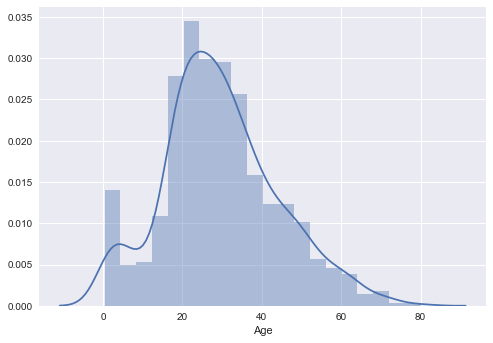

In [1203]:
sns.distplot(raw_data['Age'].dropna())

In [1204]:
raw_data[raw_data['Age']<10].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,1,S,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,0,Q,child
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,0,S,child
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,0,C,child


In [1205]:
raw_data['Age']=raw_data['Age'].fillna(-1)
raw_data[raw_data['Age']==-1].shape[0]

177

In [1206]:
raw_test['Age']=raw_test['Age'].fillna(-1)
raw_test[raw_test['Age']==-1].shape[0]

86

**Note** : some age data are missing

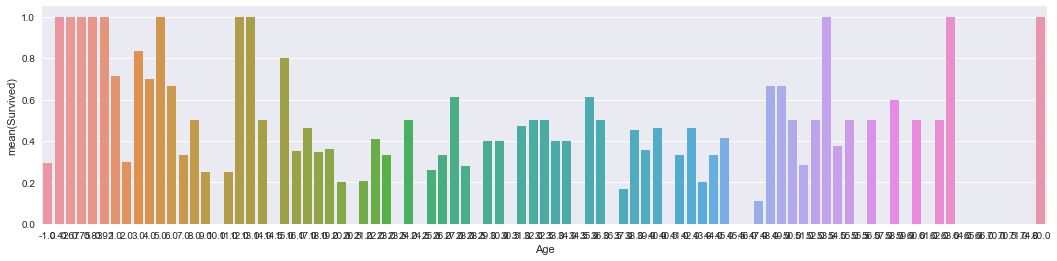

In [1207]:
average_age = raw_data.groupby(['Age'],as_index=False)['Survived'].mean()
fig, ax = plt.subplots(1,1,figsize=(18,4))
sns.barplot(x='Age', y='Survived', data=average_age)

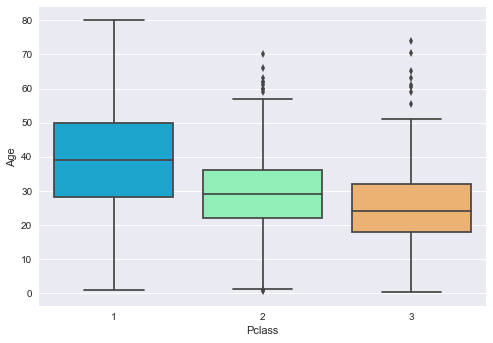

In [1208]:
sns.boxplot(x='Pclass',y='Age',data=raw_tot,palette='rainbow')

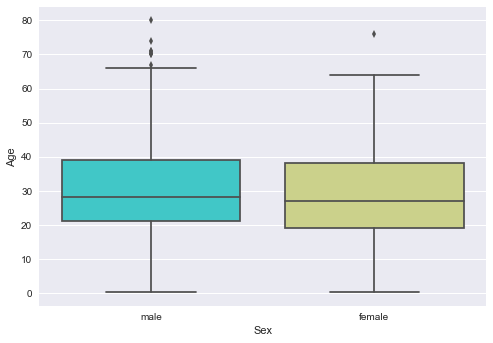

In [1209]:
sns.boxplot(y="Age",x="Sex",data=raw_tot,palette='rainbow')

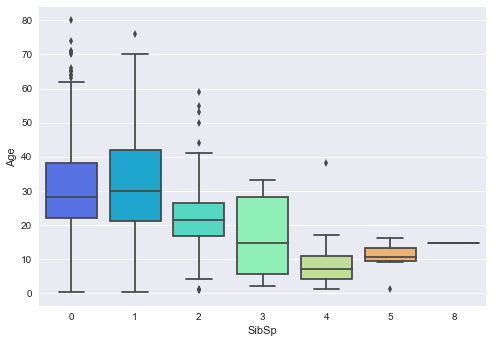

In [1210]:
sns.boxplot(y="Age",x="SibSp",data=raw_tot,palette='rainbow')

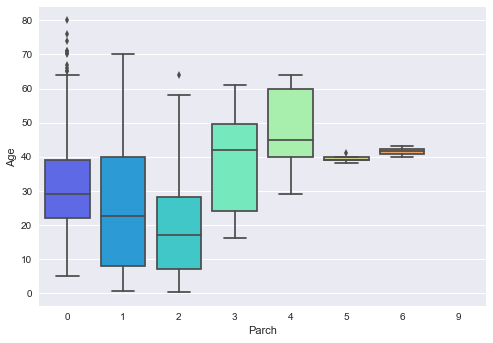

In [1211]:
sns.boxplot(y="Age",x="Parch",data=raw_tot,palette='rainbow')

In [1212]:
raw_tot["Sex"] = raw_tot["Sex"].map({"male": 0, "female":1})

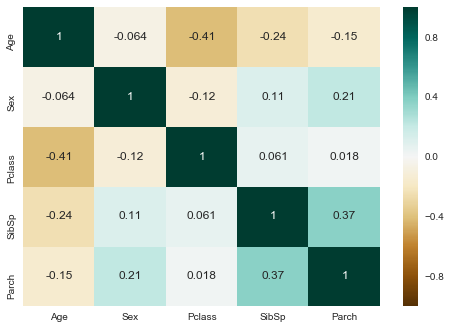

In [1213]:
sns.heatmap(raw_tot[['Age','Sex','Pclass','SibSp','Parch']].corr(),cmap="BrBG",annot=True)

### (6) Survival vs Sibsp

In [1214]:
raw_data['SibSp']=raw_data['SibSp'].fillna(-1)
raw_data[raw_data['SibSp']==-1].shape[0]

0

In [1215]:
raw_test['SibSp']=raw_test['SibSp'].fillna(-1)
raw_test[raw_test['SibSp']==-1].shape[0]

0

**Mark**: no missing data for sibsp

In [1216]:
survived_sibsp = pd.crosstab(index=raw_data["Survived"],
                            columns=raw_data["SibSp"])

survived_sibsp

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


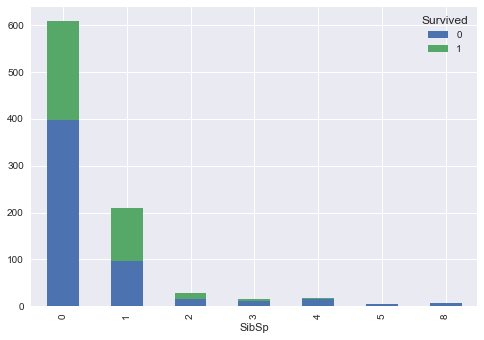

In [1217]:
survived_sibsp.transpose().plot.bar(stacked=True)

### (7) Survial vs Parch

In [1218]:
raw_data['Parch']=raw_data['Parch'].fillna(-1)
raw_data[raw_data['Parch']==-1].shape[0]

0

In [1219]:
raw_test['Parch']=raw_test['Parch'].fillna(-1)
raw_test[raw_test['Parch']==-1].shape[0]

0

**Mark** no missing data for parch

In [1220]:
survived_parch = pd.crosstab(index=raw_data["Survived"],
                            columns=raw_data["Parch"])

survived_parch

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


### (8) Survial vs Fare

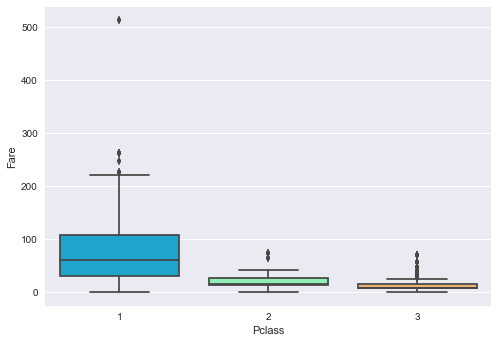

In [1221]:
sns.boxplot(y="Fare",x="Pclass",data=raw_tot,palette='rainbow')

In [1222]:
raw_data['Fare']=raw_data['Fare'].fillna(-1)
raw_data[raw_data['Fare']==-1].shape[0]

0

**Mark** no missing data for train set

In [1223]:
raw_test['Fare']=raw_test['Fare'].fillna(-1)
raw_test[raw_test['Fare']==-1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,-1.0,0,S


In [1224]:
raw_test.loc[raw_test['Fare']==-1,'Fare']=0
raw_test.loc[raw_test['Pclass']==3,'Fare'].mean()
raw_test.loc[raw_test['Fare']==-1,'Fare']=12.40
raw_data[raw_data['Fare']==-1].shape[0]

0

**Mark** 1 missing data for test set, assign average value to it as its Pclass=3

In [1225]:
raw_data['Fare'].max()

512.32920000000001

In [1226]:
raw_data['Fare'].min()

0.0

In [1227]:
bins=[0,25,50,100,150,200,250,300,520]
group_names = ['0-25','25-50','50-100','100-150','150-200','200-250','250-300', '>300']
raw_data['Fare_range']=pd.cut(raw_data['Fare'], bins, labels=group_names)
pd.value_counts(raw_data['Fare_range'])

0-25       542
25-50      174
50-100     107
100-150     24
200-250     11
150-200      9
250-300      6
>300         3
Name: Fare_range, dtype: int64

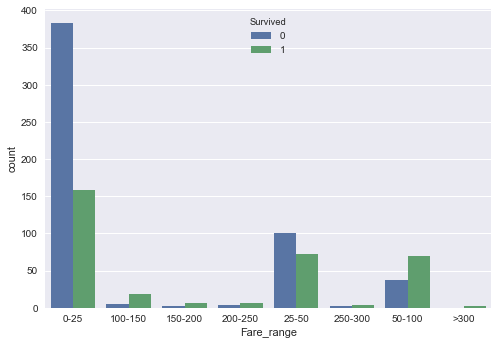

In [1228]:
sns.countplot(x="Fare_range", hue="Survived", data=raw_data[['Fare_range','Survived']])

###  Name Feature

In [1229]:
raw_tot["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [1230]:
def getTitle(title):
    return title.split(",")[1].split(".")[0].strip()
raw_tot["Title"]=raw_tot["Name"].apply(getTitle)

In [1231]:
raw_tot["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

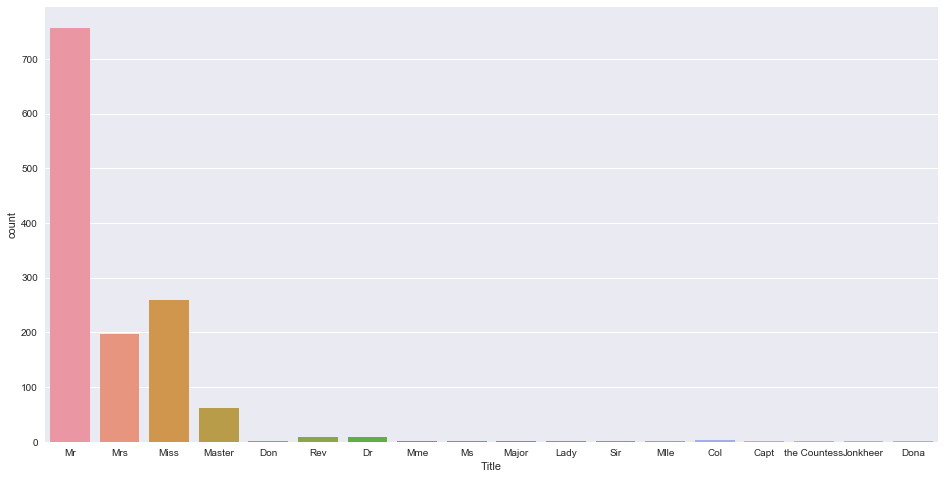

In [1233]:
plt.figure(figsize=(16,8))
sns.countplot(x="Title",data=raw_tot)

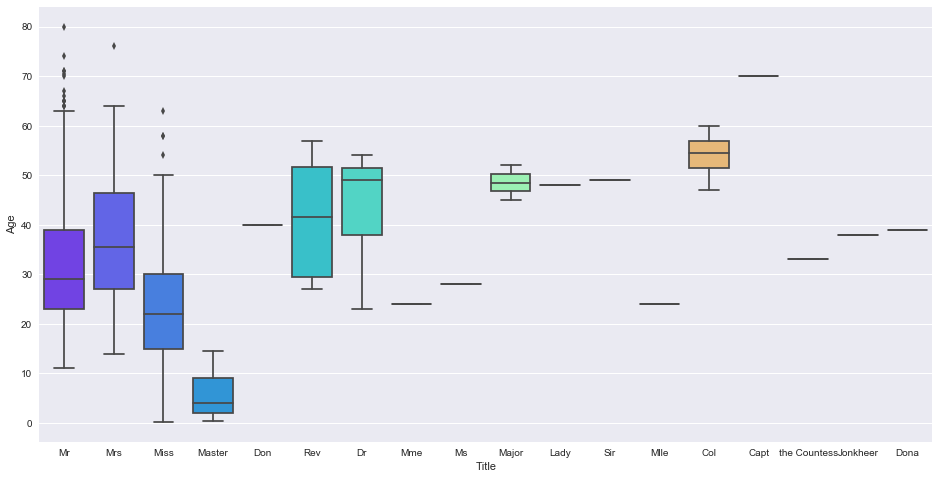

In [1235]:
plt.figure(figsize=(16,8))
sns.boxplot(y="Age",x="Title",data=raw_tot,palette='rainbow')